# Recommendation Systems 
# ISHANT KUNDRA

### Q1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. [15 Marks]

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import accuracy
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import Reader
from pandas.core.common import random_state

#### Q1A. Merge all the provided CSVs into one dataFrame. [2 Marks]

In [2]:
# read the provided CSVs
data1=pd.read_csv("Desktop/data/11.csv",encoding = 'latin-1')
data2=pd.read_csv("Desktop/data/22.csv",encoding = 'latin-1')
data3=pd.read_csv("Desktop/data/33.csv",encoding = 'latin-1')
data4=pd.read_csv("Desktop/data/44.csv",encoding = 'latin-1')
data5=pd.read_csv("Desktop/data/55.csv",encoding = 'latin-1')
data6=pd.read_csv("Desktop/data/66.csv",encoding = 'latin-1')


In [3]:
data1.shape

(374910, 11)

In [4]:
data2.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [5]:
print(data1.columns)
print(data1.shape)

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
(374910, 11)


In [6]:
print(data2.columns)
print(data2.shape)

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
(114925, 11)


In [7]:
print(data3.columns)
print(data3.shape)

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
(312961, 11)


In [8]:
print(data4.columns)
print(data4.shape)

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
(98284, 11)


In [9]:
print(data5.columns)
print(data5.shape)

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
(350216, 11)


In [10]:
print(data6.columns)
print(data6.shape)

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')
(163837, 11)


In [11]:
data_reviews= pd.concat([data1,data2,data3,data4,data5,data6],axis=0)
data_reviews

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
...,...,...,...,...,...,...,...,...,...,...,...
163832,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
163833,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
163834,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
163835,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy


In [12]:
print(data_reviews.shape)
print(data_reviews.columns)

(1415133, 11)
Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')


#### Q1B. Explore, understand the Data and share at least 2 observations. [2 Marks]

In [13]:
data_reviews

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
...,...,...,...,...,...,...,...,...,...,...,...
163832,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
163833,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
163834,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
163835,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy


In [14]:
data_reviews.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [15]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In [16]:
data_reviews.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [17]:
data_reviews.nunique()

phone_url       5556
date            7728
lang              22
country           42
source           331
domain           384
score             86
score_max          1
extract      1321353
author        801103
product        61313
dtype: int64

In [18]:
data_reviews['score']

0         10.0
1         10.0
2          6.0
3          9.2
4          4.0
          ... 
163832     2.0
163833    10.0
163834     2.0
163835     8.0
163836     2.0
Name: score, Length: 1415133, dtype: float64

#### Q1D. Check for missing values. Impute the missing values, if any. [2 Marks]

In [19]:
data_reviews['score_max']=data_reviews['score_max'].fillna(data_reviews['score_max'].mean())

In [20]:
data_reviews.describe()

,score,score_max
count,1.351644e+06,1415133.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


In [21]:
data_reviews['score']=data_reviews['score'].fillna(data_reviews['score'].mean())

In [22]:
data_reviews.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63202
product          1
dtype: int64

#### Q1C. Round off scores to the nearest integers. [3 Marks]

In [23]:
data_reviews['score'] = data_reviews['score'].astype(int)
data_reviews['score_max'].round(0).astype(int)
data_reviews['score'].round(0).astype(int)

0         10
1         10
2          6
3          9
4          4
          ..
163832     2
163833    10
163834     2
163835     8
163836     2
Name: score, Length: 1415133, dtype: int64

#### Q1E. Check for duplicate values and remove them, if any. [2 Marks]

In [24]:
data_reviews.duplicated().sum()

6430

In [25]:
data_reviews.drop_duplicates(keep='first',inplace=True)

In [26]:
data_reviews.duplicated().sum()

0

#### Q1G. Drop irrelevant features. Keep features like Author, Product, and Score. [2 Marks]

In [27]:
new_data=data_reviews.drop(['phone_url', 'date', 'lang','source', 'domain','extract','score_max','country'],axis=1)

In [28]:
new_data

,score,author,product
0,10,CarolAnn35,Samsung Galaxy S8
1,10,james0923,Samsung Galaxy S8
2,6,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,9,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,4,S Ate Mine,Samsung Galaxy S8
...,...,...,...
163832,2,david.paul,Alcatel Club Plus Handy
163833,10,Christiane14,Alcatel Club Plus Handy
163834,2,michaelawr,Alcatel Club Plus Handy
163835,8,claudia0815,Alcatel Club Plus Handy


#### Q1F. Keep only 1 Million data samples. Use random state=612. [2 Marks]

In [29]:
new_data1=new_data.sample(n=100000,random_state=612)

In [30]:
new_data1.value_counts()

score  author                    product                                                                               
10     Amazon Customer           OnePlus 3 (Soft Gold, 64 GB)                                                              87
                                 OnePlus 3 (Graphite, 64 GB)                                                               75
                                 Lenovo Vibe K4 Note (White,16GB)                                                          66
8      Amazon Customer           Lenovo Vibe K4 Note (White,16GB)                                                          61
10     Amazon Customer           Lenovo Vibe K4 Note (Black, 16GB)                                                         53
                                                                                                                           ..
8      Lison                     Samsung Chargeur secteur dâorigine Samsung ETA0U10EBE pour SM-G360 Galaxy Core Prime     

### Q2. Answer the following questions. [10 Marks]

#### Q2A. Identify the most rated products. [3 Marks]

In [31]:
new_data1['product'].value_counts().head(15)

Lenovo Vibe K4 Note (White,16GB)                                                                                                                                                             345
Lenovo Vibe K4 Note (Black, 16GB)                                                                                                                                                            314
OnePlus 3 (Graphite, 64 GB)                                                                                                                                                                  283
OnePlus 3 (Soft Gold, 64 GB)                                                                                                                                                                 249
Samsung Galaxy Express I8730                                                                                                                                                                 221
Huawei P8lite zwart / 16 GB        

#### Q2B. Identify the users with most number of reviews. [3 Marks]

In [32]:
new_data1[new_data1['score']==10]['author'].value_counts().head()

Amazon Customer    2240
Cliente Amazon      711
e-bit               378
Client d'Amazon     230
einer Kundin        161
Name: author, dtype: int64

#### Q2C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset. [4 Marks]
 

In [33]:
#list of authors
top_50_authors = new_data1['author'].value_counts()
top_50_authors= top_50_authors[top_50_authors>50].index.tolist()
#list of products
top_50_products = new_data1['product'].value_counts()
top_50_products = top_50_products[top_50_products>50].index.tolist()


In [34]:
print(top_50_authors)
print(top_50_products)

['Amazon Customer', 'Cliente Amazon', 'e-bit', "Client d'Amazon", 'Amazon Kunde', 'einer Kundin', 'Anonymous', 'unknown', 'einem Kunden', 'David', 'Anonymous ', 'Marco', 'Ð\x94Ð¼Ð¸Ñ\x82Ñ\x80Ð¸Ð¹', 'Ð¡ÐµÑ\x80Ð³ÐµÐ¹', 'Ð\x90Ð»ÐµÐºÑ\x81Ð°Ð½Ð´Ñ\x80', 'Alex', 'ZÃ¡kaznÃ\xadk', 'Ð\x90Ð½Ð´Ñ\x80ÐµÐ¹']
['Lenovo Vibe K4 Note (White,16GB)', 'Lenovo Vibe K4 Note (Black, 16GB)', 'OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3 (Soft Gold, 64 GB)', 'Samsung Galaxy Express I8730', 'Huawei P8lite zwart / 16 GB', 'Lenovo Vibe K5 (Gold, VoLTE update)', 'Samsung Galaxy S6 zwart / 32 GB', 'Lenovo Vibe K5 (Grey, VoLTE update)', 'Nokia 5800 XpressMusic', 'Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)', 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', "Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]", 'Samsung Galaxy S7 edge 32GB (T-Mobile)', 'Nokia N95', 

In [35]:
top50_prod_With_rev=new_data1[(new_data1['author'].isin(top_50_authors)) & (new_data1['product'].isin(top_50_products))]

In [36]:
top50_prod_With_rev

,score,author,product
366390,8,Amazon Customer,OnePlus X (Limited Edition Ceramic)
55650,4,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)"
73076,10,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)"
359394,2,Amazon Customer,"Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB)"
66124,2,Amazon Customer,"OnePlus One (Sandstone Black, 64GB)"
...,...,...,...
13529,2,Amazon Customer,"Motorola Moto G Turbo (White, 16GB)"
71733,8,Amazon Customer,Samsung Guru GT-E1200 (Indigo Blue)
359054,2,Amazon Customer,"Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB)"
20963,2,Amazon Customer,"Lenovo Vibe K5 (Silver, 16GB)"


In [37]:
top50_prod_With_rev['product'].unique()[:100]

array(['OnePlus X (Limited Edition Ceramic)',
       'Lenovo Vibe K4 Note (Black, 16GB)', 'OnePlus 3 (Graphite, 64 GB)',
       'Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB)',
       'OnePlus One (Sandstone Black, 64GB)',
       'Lenovo Vibe K4 Note (White,16GB)',
       'Samsung Galaxy S5 16GB (T-Mobile)',
       'Lenovo Vibe K5 (Grey, VoLTE update)', 'OnePlus X (Onyx, 16GB)',
       'Lenovo Vibe X3 (White, 32GB)',
       'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)',
       'Lenovo Vibe K5 (Gold, VoLTE update)',
       'Apple iPhone 5s (Silver, 16GB)', 'OnePlus 3 (Soft Gold, 64 GB)',
       "Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]",
       'Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray',
       'OnePlus 2 (Sandstone Black, 64GB)',
       'Motorola Moto G Turbo (White, 16GB)',
       'Samsung Galaxy S7 edge Smartphone, 13,9 cm 

In [38]:
top50_prod_With_rev['author'].unique()[:100]

array(['Amazon Customer', 'Anonymous ', 'Cliente Amazon', 'einem Kunden',
       'einer Kundin', 'e-bit', 'Ð\x94Ð¼Ð¸Ñ\x82Ñ\x80Ð¸Ð¹', 'Marco',
       'Anonymous', 'Amazon Kunde', 'Alex', 'unknown',
       'Ð\x90Ð»ÐµÐºÑ\x81Ð°Ð½Ð´Ñ\x80', 'Ð¡ÐµÑ\x80Ð³ÐµÐ¹', 'David',
       'Ð\x90Ð½Ð´Ñ\x80ÐµÐ¹'], dtype=object)

In [39]:
top50_prod_With_rev.shape

(2240, 3)

### Q3. Build a popularity based model and recommend top 5 mobile phones. [5 Marks]

In [40]:
def popularity(data):
    print('Top five mobile phones recommendations for you are:')

    r_m_c = pd.DataFrame(data.groupby('product')['score'].mean())
    r_m_c['ratings'] = data.groupby('product')['score'].count()
    r_m_c= r_m_c.sort_values(by=['score','ratings'])
    print(r_m_c.head())
    return

In [41]:
popularity(top50_prod_With_rev)

Top five mobile phones recommendations for you are:
                                                   score  ratings
product                                                          
Apple iPhone 5 Unlocked Cellphone, 32GB, Black  4.666667        6
Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)    4.939759       83
OnePlus 2 (Sandstone Black, 64GB)               5.400000       30
Motorola Moto G Turbo (White, 16GB)             5.762712       59
OnePlus One (Sandstone Black, 64GB)             5.857143       28


In [42]:
popularity(new_data1)

Top five mobile phones recommendations for you are:
                       score  ratings
product                              
Nokia 3110 classik       0.0        1
Apple iPhone 6s 32GB     1.0        1
C150                     1.0        1
C61                      1.0        1
HTC Desire 816 (grey)    1.0        1


### Q4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model. [10 Marks]

In [43]:
data_rev1 = new_data1.reindex(columns=['author','product','score'])

In [44]:
data_samples = data_rev1.sample(n=5000, random_state=612)

data = Dataset.load_from_df(data_samples,Reader(rating_scale=(1, 10)))

In [45]:
x_train= data.build_full_trainset()

In [46]:
x_train.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 10.0)],
             2: [(2, 10.0), (2190, 10.0), (2554, 10.0)],
             3: [(3, 6.0)],
             4: [(4, 8.0)],
             5: [(5, 10.0)],
             6: [(6, 10.0)],
             7: [(7, 2.0),
              (7, 8.0),
              (172, 8.0),
              (247, 8.0),
              (323, 8.0),
              (365, 10.0),
              (472, 8.0),
              (475, 4.0),
              (477, 8.0),
              (308, 8.0),
              (686, 10.0),
              (7, 2.0),
              (897, 10.0),
              (965, 2.0),
              (991, 2.0),
              (1014, 8.0),
              (1065, 10.0),
              (1073, 10.0),
              (1160, 8.0),
              (1207, 10.0),
              (1229, 2.0),
              (1290, 10.0),
              (1335, 8.0),
              (1344, 10.0),
              (1452, 10.0),
              (1482, 2.0),
              (1522, 6.0),
              (1535, 8.0),
      

In [47]:
svd = SVD()
svd.fit(x_train)

In [48]:
x_test =x_train.build_anti_testset()

In [49]:
pred_svd= svd.test(x_test)

In [50]:
pred_svd

[Prediction(uid='kolbanoff', iid='Sony Xperia Z1 Compact D5503 Android Smartphone (Black) International Version No Warranty', r_ui=7.9892, est=8.197364819200851, details={'was_impossible': False}),
 Prediction(uid='kolbanoff', iid='Huawei Honor 8 Unlocked Smartphone 32 GB Dual Camera - US Warranty (Midnight Black)', r_ui=7.9892, est=8.42054407766701, details={'was_impossible': False}),
 Prediction(uid='kolbanoff', iid='Philips Fisio 121', r_ui=7.9892, est=8.125038829965458, details={'was_impossible': False}),
 Prediction(uid='kolbanoff', iid='Lenovo Vibe P1 Turbo (Grey)', r_ui=7.9892, est=8.37058119628838, details={'was_impossible': False}),
 Prediction(uid='kolbanoff', iid='Samsung Utopia S5611 SIM-Free Mobile Phone - Black', r_ui=7.9892, est=8.374549611262857, details={'was_impossible': False}),
 Prediction(uid='kolbanoff', iid='Samsung i9500 Galaxy S4', r_ui=7.9892, est=8.376579536572391, details={'was_impossible': False}),
 Prediction(uid='kolbanoff', iid='Samsung Galaxy S5 neo 16G

In [51]:
X_1= Dataset.load_from_df(data_samples,reader=Reader(rating_scale=(1, 10)))

In [52]:
X_train1, X_test1 = train_test_split(X_1, test_size=.15)

In [53]:
knn_user= KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
knn_user.fit(X_train1)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [54]:
pred_knn_user = knn_user.test(X_test1)

In [55]:
X_test1

[('QueBella2012', 'Apple iPhone 5c', 9.0),
 ('hypocenter', 'Samsung Galaxy S6 zwart / 32 GB', 8.0),
 ('Misery Poe', 'Motorola W490', 5.0),
 ('cjk03 ', 'Samsung Galaxy S6 32GB (AT&T)', 10.0),
 ('Ð\x94Ð°Ð½Ð¸Ð»ÐµÐ½ÐºÐ¾ Ð\x95Ð»ÐµÐ½Ð°',
  'Samsung Galaxy Note II GT-N7100 16Gb',
  8.0),
 (nan, 'Sony Ericsson U5 Vivaz', 6.0),
 ('shailesh pathak',
  'Samsung Galaxy J7 (2016 Edition) SM-J710F (Gold, 16GB)',
  2.0),
 ('Miguel R.',
  'Pixel Google Pixel XL G2PW210032GBBK Factory Unlocked Smartphone, 32GB, 5.5-Inch Display - U.S. Version (Quite Black)',
  2.0),
 ('Nuno', 'Nokia Lumia 920 Sim Free Windows Smartphone - Black', 10.0),
 ('Daniela',
  'Smartphone Samsung Galaxy S7 G930F, Octa Core 2.3GHz, Android 6.0, Tela Super Amoled 5.1Â´, 32GB, 12MP, 4G, Desbl - Dourado',
  10.0),
 ('Daniel Seitz',
  'Samsung Galaxy J3 (2016) DUOS Smartphone (5,0 Zoll (12,63 cm Touch-Display, 8 GB Speicher, Android 5.1) gold',
  10.0),
 ('Jan Depuydt', 'HTC Wildfire S Black', 9.0),
 ('Ð\x9bÑ\x8e Ð\xa0Ñ\x83',
  'Ð¡Ð

In [56]:
X_2= Dataset.load_from_df(data_samples,reader=Reader(rating_scale=(1, 10)))

In [57]:
X_train2, X_test2 = train_test_split(X_2, test_size=.15)

In [58]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
knn_Item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
knn_Item.fit(X_train2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [59]:
new_data1

,score,author,product
100431,10,cat19y,Samsung Galaxy Ace GT-S5830
15887,8,dazzer86,Sony Xperia S
54918,10,Martin,Apple iPhone 7 128GB Black
17943,2,Amazon Customer,Samsung Galaxy Ace 2 I8160 4GB White WiFi Andr...
153696,8,WOLSWIJK,Sony Xperia X Compact zwart / 32 GB
...,...,...,...
306828,10,prem11141,Asus Zenfone Max ZC550KL (16 GB)
175165,8,Gaetano,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro..."
196453,10,NaN,Sony Xperia L (ÐºÑÐ°ÑÐ½ÑÐ¹)
23121,6,Amazon Customer,"Lenovo Vibe K5 (Gold, VoLTE update)"


In [60]:
pred_test= knn_Item.test(X_test2)
pred_test

[Prediction(uid='Jay "The Middle-Aged Student"', iid='Samsung Accessories Galaxy S3 Mini GT-i8190 Unlocked, International Version, Blue', r_ui=10.0, est=7.972941176470588, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Amazon Customer', iid='Lenovo Vibe K4 Note (White,16GB)', r_ui=6.0, est=6.25181168342135, details={'actual_k': 9, 'was_impossible': False}),
 Prediction(uid='Vicente Mateo AriÃ±o', iid='BQ Aquaris 5 - Smartphone libre Android (pantalla 5 pulgadas, cÃ¡mara 8 Mp, 16 GB, Quad-Core 1.2 GHz, 1 GB RAM), blanco', r_ui=4.0, est=7.972941176470588, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Dan', iid='HTC One M8 - Factory Unlocked 32GB - US Warranty (Glacial Silver)', r_ui=10.0, est=7.972941176470588, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=nan, iid='NOKIA E63 CEP TELEFONU', r_ui=6.0, est=7.972941176470588, details={'was_impossible'

### Q5. Evaluate the collaborative model. Print RMSE value. [2 Marks]

In [61]:
print("RMSE of KNN_Item based:",accuracy.rmse(pred_test, verbose=True))
print("RMSE of SVD:",accuracy.rmse(pred_svd,verbose=True))
print("RMSE of KNN_User based:",accuracy.rmse(pred_knn_user,verbose=True))

RMSE: 2.4845
RMSE of KNN_Item based: 2.4844664153620273
RMSE: 0.3336
RMSE of SVD: 0.3335630549531045
RMSE: 2.6389
RMSE of KNN_User based: 2.6388949327110813


In [62]:
pred_user= knn_user.predict('cat19y','Samsung Galaxy Ace GT-S5830',verbose=2)

user: cat19y     item: Samsung Galaxy Ace GT-S5830 r_ui = None   est = 8.02   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [63]:
pred1=knn_Item.predict('cat19y'	,'Samsung Galaxy Ace GT-S5830',verbose=2)

user: cat19y     item: Samsung Galaxy Ace GT-S5830 r_ui = None   est = 7.97   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [64]:
accuracy.fcp(pred_test,verbose=2)

FCP:  0.3750


0.3750412677451304

In [65]:
pred1=knn_Item.predict('cat19y'	,'Samsung Galaxy Ace GT-S5830',verbose=2)

user: cat19y     item: Samsung Galaxy Ace GT-S5830 r_ui = None   est = 7.97   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [66]:
pred_test

[Prediction(uid='Jay "The Middle-Aged Student"', iid='Samsung Accessories Galaxy S3 Mini GT-i8190 Unlocked, International Version, Blue', r_ui=10.0, est=7.972941176470588, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Amazon Customer', iid='Lenovo Vibe K4 Note (White,16GB)', r_ui=6.0, est=6.25181168342135, details={'actual_k': 9, 'was_impossible': False}),
 Prediction(uid='Vicente Mateo AriÃ±o', iid='BQ Aquaris 5 - Smartphone libre Android (pantalla 5 pulgadas, cÃ¡mara 8 Mp, 16 GB, Quad-Core 1.2 GHz, 1 GB RAM), blanco', r_ui=4.0, est=7.972941176470588, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Dan', iid='HTC One M8 - Factory Unlocked 32GB - US Warranty (Glacial Silver)', r_ui=10.0, est=7.972941176470588, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=nan, iid='NOKIA E63 CEP TELEFONU', r_ui=6.0, est=7.972941176470588, details={'was_impossible'

### Q7. Report your findings and inferences. [2 Marks]

In [67]:
top50_prod_With_rev.head(5)

,score,author,product
366390,8,Amazon Customer,OnePlus X (Limited Edition Ceramic)
55650,4,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)"
73076,10,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)"
359394,2,Amazon Customer,"Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB)"
66124,2,Amazon Customer,"OnePlus One (Sandstone Black, 64GB)"


### Q8. Try and recommend top 5 products for test users. [5 Marks]

In [68]:
def top_n_pred(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].insert(0,(iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [69]:
top_n_pred(pred_test,n=5)

defaultdict(list,
            {'Jay "The Middle-Aged Student"': [('Samsung Accessories Galaxy S3 Mini GT-i8190 Unlocked, International Version, Blue',
               7.972941176470588)],
             'Amazon Customer': [('Lenovo Vibe K5 (Silver, 16GB)', 10),
              ('Lenovo Vibe S1 (4G, Dark Blue)', 8.992027039538081),
              ('OnePlus X (Onyx, 16GB)', 8.658521132774357),
              ('Samsung Galaxy J7 J700M 16GB Dual Sim LTE Unlocked Phone - Retail Packaging - White (International Version)',
               8.0),
              ('Lenovo Vibe X3 (White, 32GB)', 7.998988244203088)],
             'Vicente Mateo AriÃ±o': [('BQ Aquaris 5 - Smartphone libre Android (pantalla 5 pulgadas, cÃ¡mara 8 Mp, 16 GB, Quad-Core 1.2 GHz, 1 GB RAM), blanco',
               7.972941176470588)],
             'Dan': [('HTC One M8 - Factory Unlocked 32GB - US Warranty (Glacial Silver)',
               7.972941176470588)],
             nan: [('Sony Ericsson Live with Walkman', 10),
           

### Q9. Try other techniques (Example: cross validation) to get better results. [3 Marks]

In [70]:
rmse_knn_item=cross_validate(knn_Item,X_2, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [71]:
rmse_knn_user=cross_validate(knn_user,X_2, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [72]:
svd_rmse=cross_validate(svd,X_2, measures=['RMSE'], cv=3, verbose=False)

### Q6. Predict score (average rating) for test users. [2 Marks]

<AxesSubplot:>

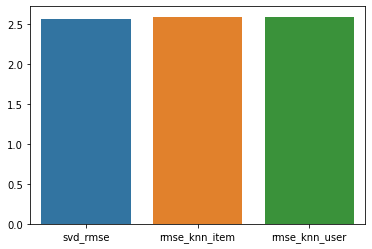

In [73]:
import seaborn as sns
sns.barplot(x=['svd_rmse','rmse_knn_item','rmse_knn_user'],
            y=[svd_rmse['test_rmse'].mean(),rmse_knn_item['test_rmse'].mean(), rmse_knn_user['test_rmse'].mean()])

### Q10. In what business scenario you should use popularity based Recommendation Systems ? [2 Marks]

### Q11. In what business scenario you should use CF based Recommendation Systems ? [2 Marks]

### Q12. What other possible methods can you think of which can further improve the recommendation for different users ? [2 Marks]